In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import corner

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Import my functions from the MRT_Funcs file

In [2]:
import ipynb.fs.full.MRT_Funcs as MRT
#from ipynb.fs.full.MRT_Funcs import SMAMeanReversion_strat, stratBacktest, applyPortfolioStrat, getStratStats, portfolio_DrawdownStats, portfolioBacktest, sum_metrics, plot_portfolio_backtest, portfolio_dashboard, hyperparam_gridsearch, clean_stat_grid, save_gridsearch, load_gridsearch, plot_gridsearch_results

### Run a single-stock backtest

2020-07-23 00:00:00


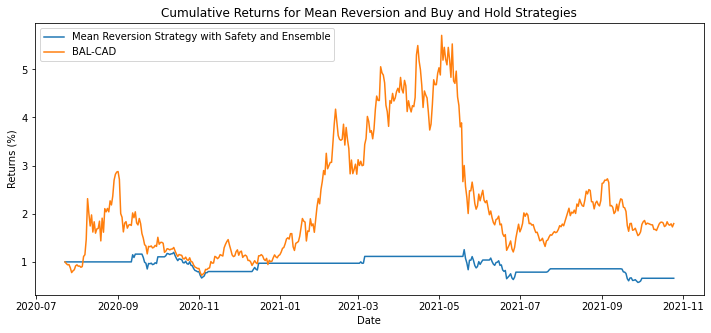

Safe+Ensemble Strategy Statistics 

                       strat_stats  base_stats
tot_returns                 -0.340       0.950
annual_returns              -0.204       0.442
annual_volatility            0.566       1.287
max_drawdown                 0.681       4.499
max_drawdown_duration      219.000     175.000


In [67]:
#Set strategy params
tickers = ['AAVE-CAD','BAL-CAD','BAT-CAD','BCH-CAD','BTC-CAD','COMP-CAD','CRV-CAD','DOGE-CAD','ETH-CAD','FIL-CAD','KNC-CAD','LINK-CAD','LTC-CAD','MANA-CAD','MATIC-CAD','MKR-CAD','SNX-CAD','SUSHI-CAD','UMA-CAD','UNI3-CAD','YFI-CAD','ZRX-CAD']
ticker = 'BAL-CAD'
start_date = '2010-05-01'
end_date = '2021-10-25'
strat='SMA_MR'
verbose = False
safety = True
SMA = 15
threshold = 0.10
safety_threshold = 0.15
short_term_sma=10
long_term_sma=30
short_long_threshold=0.05
#Pack the strategy settings
strat_settings1 = [ticker, strat, SMA, threshold, safety, safety_threshold, short_term_sma, long_term_sma, short_long_threshold, start_date,end_date]

#Run the backtest
data = MRT.stratBacktest(strat_settings1)

#Calculate backtest stats
stats_dict = MRT.getStratStats(data)
df_stats = pd.DataFrame(stats_dict).round(3)

#Normalize backtest results
first_valid_day = data.first_valid_index()
print(first_valid_day)
data_normalized = data/data.loc[first_valid_day]

#Plot the results
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data_normalized['strat_cum_returns'], label='Mean Reversion Strategy with Safety and Ensemble')
ax.plot(data_normalized['cum_returns'], label=f'{ticker}')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.set_title('Cumulative Returns for Mean Reversion and Buy and Hold Strategies')

ax.legend()
plt.show()

print('Safe+Ensemble Strategy Statistics \n')
print(df_stats)

### Get portfolio decisions for today

In [6]:
#List of stocks we want to consider in our portfolio
#tickers = ['ETH-CAD','BTC-CAD','ADA-CAD','BNB-CAD','SNP','GOOGL','AAPL']
tickers = ['BTC-CAD','CRV-CAD','COMP-CAD','ETH-CAD','LINK-CAD']
#tickers = ['AAVE-CAD','BAL-CAD','BAT-CAD','BCH-CAD','BTC-CAD','COMP-CAD','CRV-CAD','DOGE-CAD','ETH-CAD','FIL-CAD','KNC-CAD','LINK-CAD','LTC-CAD','MANA-CAD','MATIC-CAD','MKR-CAD','SNX-CAD','SUSHI-CAD','UMA-CAD','UNI3-CAD','YFI-CAD','ZRX-CAD']
#tickers = ['TSLA','AAPL','TD','AMZN','SHOP','MSFT','RY','BNS','NVDA','CNR','BMO','FTS','ARKK','ABNB','NFLX','COIN','FB','BCE','VOO','DOL','SQ','KO','GOOGL','WMT']
current_positions = [1]*len(tickers)

#Set strategy params
strat_func = MRT.SMAMeanReversion_strat
SMA = 15 #have to make sure this is less than 2*long_term_sma, otherwise not enough data is downloaded and extension returns nan
threshold = 0.1
safety = False
safety_threshold = 0.15
short_term_sma=10
long_term_sma=30
short_long_threshold=0.05
tp_threshold = 0.7
#Pack the strategy settings
strat_settings2 = [strat_func, tickers, current_positions, SMA, threshold, safety, safety_threshold, short_term_sma, long_term_sma, short_long_threshold, tp_threshold]

#Apply strategy to portfolio
decisions = MRT.applyPortfolioStrat(strat_settings2)
MRT.portfolio_dashboard(decisions)

,ticker,latest_close_price,expected_price,extension,extension_position,short_long ratio,short_long_position,movement,take_profit_price,position
0,BTC-CAD,60412.434,64559.567,-0.025,0.000,0.910,1.000,Hold,63315.427,0.000
1,CRV-CAD,5.834,5.139,0.199,0.000,0.891,1.000,Hold,5.347,0.000
2,ETH-CAD,5107.608,5272.378,-0.017,0.000,0.948,1.000,Hold,5222.947,0.000
3,LINK-CAD,25.170,27.075,0.002,0.000,0.842,1.000,Hold,26.504,0.000


### Run a portfolio backtest

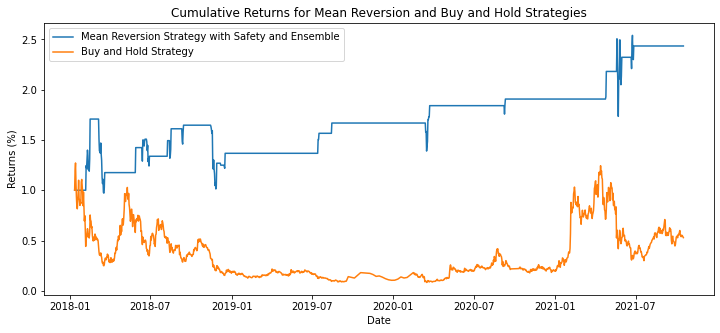

Portfolio Backtest Statistics


,strat_stats,base_stats
tot_returns,1.434,-0.545
annual_returns,0.201,-0.149
annual_volatility,0.414,1.153
max_drawdown,0.771,9.380
max_drawdown_duration,746.000,1373.000


In [73]:
#List of stocks we want to consider in our portfolio
#tickers = ['AAVE-CAD','BAL-CAD','BAT-CAD','BCH-CAD','BTC-CAD','COMP-CAD','CRV-CAD','DOGE-CAD','ETH-CAD','FIL-CAD','KNC-CAD','LINK-CAD','LTC-CAD','MANA-CAD','MATIC-CAD','MKR-CAD','SNX-CAD','SUSHI-CAD','UMA-CAD','UNI3-CAD','YFI-CAD','ZRX-CAD']
#tickers = ['TSLA','AAPL','TD','AMZN','SHOP','MSFT','RY','BNS','NVDA','CNR','BMO','FTS','ARKK','NFLX','FB','BCE','VOO','DOL','SQ','KO','GOOGL','WMT']
#tickers = ['SNP','GOOGL','AAPL','TD','AMZN','BMO','CNR','NVDA','ARKK','NFLX','FB','VOO','GOOGL','WMT']
#tickers = ['SNP','TSLA']
#Cryptos valid back to 2018-01
tickers = ['ADA-CAD','BAT-CAD','BCH-CAD','BTC-CAD','DOGE-CAD','ETH-CAD','FIL-CAD','LINK-CAD','LTC-CAD','MANA-CAD','MKR-CAD','XTZ-CAD','XLM-CAD','ZRX-CAD']

verbose = False

start_date = '2015-05-01'
end_date = '2021-10-17'
strat='SMA_MR'
SMA = 20
threshold = 0.2
safety = False
safety_threshold = 0.15
short_term_sma=10
long_term_sma=30
short_long_threshold=0.05

strat_settings3 = [tickers, strat, SMA, threshold, safety, safety_threshold, short_term_sma, long_term_sma, short_long_threshold, start_date, end_date, verbose]
#Run the backtest on the entire portfolio
portfolio_returns, portfolio_stats = MRT.portfolioBacktest(strat_settings3)
#Plot portfolio backtest returns
MRT.plot_portfolio_backtest(portfolio_returns)
#Print portfolio backtest statistics
print('Portfolio Backtest Statistics')
round(portfolio_stats,3)